First 5 rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   Pedigree  Age  Outcome  
0     0.627   50        1  
1     0.351   31        0  
2     0.672   32        1  
3     0.167   21        0  
4     2.288   33        1   

Missing values in each column:
Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64 

Statistical Summary:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.

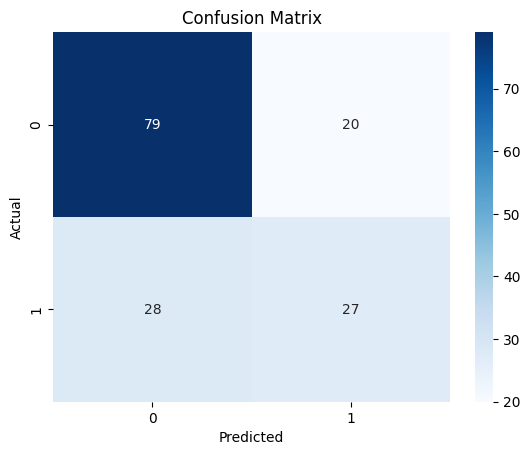

Accuracy: 0.69
Error Rate: 0.31
Precision: 0.57
Recall: 0.49


In [3]:
# 🧮 Assignment 4: K-Nearest Neighbors (KNN) on Diabetes Dataset

# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# Step 2: Load the Dataset
# Make sure 'diabetes.csv' is in the same folder as this notebook
df = pd.read_csv('diabetes.csv')
print("First 5 rows of the dataset:")
print(df.head(), "\n")

# Step 3: Data Preprocessing
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum(), "\n")

# Display statistical overview
print("Statistical Summary:")
print(df.describe(), "\n")

# Split features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Feature scaling using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print(f"Training size: {len(X_train)}, Testing size: {len(X_test)}\n")

# Step 5: Apply K-Nearest Neighbors (KNN) Algorithm
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Step 6: Confusion Matrix & Evaluation Metrics
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Plotting Confusion Matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Error Rate: {error_rate:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
